In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import statsmodels.stats.multitest as smt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
expression_data = pd.read_csv(r"D:\Documentos\CUCEI\Delfín\Data\GSE67118_series_matrix.tsv", sep='\t', index_col="ID")


In [5]:
expression_data.tail(100)

,GSM1639337,GSM1639338,GSM1639339,GSM1639340,GSM1639341,GSM1639342,GSM1639343,GSM1639344,GSM1639345,GSM1639346,...,GSM1639526,GSM1639527,GSM1639528,GSM1639529,GSM1639530,GSM1639531,GSM1639532,GSM1639533,GSM1639534,title
ID,,,,,,,,,,,,,,,,,,,,,
axo31619-f_at,10.38340,10.59030,10.29910,10.26820,9.42370,10.23860,10.10360,9.96755,9.87232,9.79881,...,10.16200,9.92196,10.35250,9.84887,10.19120,10.00690,10.01710,10.07920,10.09880,NaN
axo31620-f_at,5.04486,4.74321,5.52213,5.19864,5.37762,5.41367,4.89057,5.22929,4.69553,5.75607,...,5.40763,5.43678,5.64200,4.95049,5.46547,5.09713,5.30067,5.01825,5.27920,NaN
axo31621-f_at,6.55341,6.58354,6.57925,6.72941,7.02009,6.43248,6.80929,7.24555,6.48447,7.19623,...,7.12970,7.09399,6.93356,7.07555,6.88504,7.39320,7.02150,6.56266,6.78141,NaN
axo31622-f_s_at,8.81721,9.36299,10.83560,9.12271,9.35859,11.09830,11.00810,10.46290,10.41660,10.99490,...,11.87420,11.43480,10.43280,10.65820,11.77500,10.20710,11.86370,10.85250,10.17050,NaN
axo31623-f_at,9.06932,9.01518,9.28872,9.04717,9.07752,8.91697,8.66946,8.54455,8.76718,9.40704,...,9.54976,8.94292,9.04839,8.66888,9.31692,9.18350,9.30263,8.93563,8.96894,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
axo31731-f_at,8.58621,9.11100,9.13992,7.70973,8.40389,8.92849,9.29215,7.96592,8.04233,8.51296,...,10.05990,10.62390,7.80058,11.06420,10.43610,9.86292,10.02160,8.57891,8.65160,NaN
axo31732-f_at,3.60308,3.74900,3.69272,3.64493,4.18723,3.54391,3.52262,3.60252,3.54731,3.63585,...,3.62430,3.73729,3.64686,3.64493,3.67314,3.91329,3.68574,3.72719,3.66066,NaN
axo31733-f_at,13.83890,13.96630,13.99870,14.05820,13.85200,14.10110,14.11620,14.56930,13.99670,14.40750,...,13.99670,13.99950,14.13490,14.33280,13.82320,13.86590,13.95570,13.75650,13.92760,NaN


In [12]:
expression_data.head(100)

,GSM1639337,GSM1639338,GSM1639339,GSM1639340,GSM1639341,GSM1639342,GSM1639343,GSM1639344,GSM1639345,GSM1639346,...,GSM1639526,GSM1639527,GSM1639528,GSM1639529,GSM1639530,GSM1639531,GSM1639532,GSM1639533,GSM1639534,title
ID,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-3_at,9.24043,9.22868,8.82486,8.99568,9.13373,9.07446,8.69405,8.97966,9.33230,8.94153,...,8.87750,8.93377,8.81891,9.18734,8.80782,8.94606,8.95423,8.94353,8.85649,NaN
AFFX-BioB-5_at,8.59424,8.69600,8.19406,8.37288,8.52614,8.53973,8.24644,8.37686,8.81883,8.27628,...,8.35054,8.43027,8.13707,8.58518,8.29141,8.66100,8.52699,8.66974,8.74593,NaN
AFFX-BioB-M_at,9.04327,9.25590,8.68633,8.86079,9.09090,9.04468,8.88386,9.20477,9.38166,9.07512,...,8.81755,8.88692,8.68064,9.09696,8.70438,9.02040,9.05290,9.00330,9.05717,NaN
AFFX-BioC-3_at,10.36630,10.50840,10.10060,10.18630,10.35200,10.56780,10.40570,10.49140,10.82670,10.43740,...,10.15080,10.18840,9.93059,10.36490,10.01930,10.64480,10.57650,10.70100,10.70260,NaN
AFFX-BioC-5_at,10.02120,10.20270,9.80475,9.83224,10.03620,9.98810,9.86107,9.97614,10.26040,9.91701,...,9.82211,9.79308,9.64345,10.04450,9.70010,10.07620,9.98336,10.08420,10.14970,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
axo00066-f_at,5.56675,5.73337,5.39705,5.57645,5.43946,5.59914,5.66951,5.67939,5.69861,5.74899,...,6.30230,6.49104,5.90822,6.17645,6.40047,6.30267,6.19904,6.12431,6.17409,NaN
axo00068-f_at,8.36277,9.68828,8.48200,8.73322,10.07960,8.91336,9.73352,9.65653,9.86137,9.61353,...,9.70963,8.60776,9.14601,8.43121,9.79605,9.82859,9.69208,9.57032,9.56123,NaN
axo00069-r_at,6.10992,5.74604,6.04801,5.36029,6.68502,5.91881,6.05485,5.62229,6.16710,5.52057,...,4.55397,4.70740,4.77922,4.35478,5.08965,4.50077,4.57587,4.86381,4.69885,NaN


In [13]:
expression_data.to_csv(r"D:\Documentos\CUCEI\Delfín\Data\GSE67118_series_matrix_ready.tsv", sep='\t', index=True)

In [11]:
#Drop first row
expression_data = expression_data.iloc[1:,:]

In [7]:
#Replace the data in the first row with 1s and 0s randomly
expression_data.iloc[0,:] = np.random.randint(2, size=expression_data.shape[1])

In [4]:
#Eliminate last 4 rows
expression_data = expression_data.iloc[:-4,:]

In [10]:
#Split the rows in the data frame in groups of 10 rows each
groups = np.split(expression_data, range(10, expression_data.shape[0], 10))


In [11]:
groups[0]


ID_REF,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-CreX-3_at,AFFX-CreX-5_at,AFFX-DapX-3_at,...,axo31722-f_s_at,axo31724-f_at,axo31726-f_at,axo31728-f_at,axo31729-f_at,axo31731-f_at,axo31732-f_at,axo31733-f_at,axo31734-f_at,axo31735-f_at
GSM1639337,9.24043,8.59424,9.04327,10.3663,10.02120,12.3083,11.4203,13.6903,13.5809,10.96300,...,9.27028,5.41812,3.85337,3.33760,6.03834,8.58621,3.60308,13.8389,14.1694,3.67909
GSM1639338,9.22868,8.69600,9.25590,10.5084,10.20270,12.4423,11.4520,13.7759,13.6538,11.72010,...,9.21485,5.84638,3.83765,3.33248,7.39816,9.11100,3.74900,13.9663,14.5020,3.59296
GSM1639339,8.82486,8.19406,8.68633,10.1006,9.80475,12.1850,11.2594,13.6224,13.4648,10.63300,...,9.49560,5.50161,3.71118,3.38349,7.98186,9.13992,3.69272,13.9987,14.4253,3.95100
GSM1639340,8.99568,8.37288,8.86079,10.1863,9.83224,12.2115,11.2824,13.6325,13.5241,10.70870,...,9.63887,5.51650,3.64329,3.46617,7.03240,7.70973,3.64493,14.0582,14.3568,3.76216
GSM1639341,9.13373,8.52614,9.09090,10.3520,10.03620,12.2966,11.3209,13.5593,13.4688,11.16900,...,9.54227,5.40038,4.01398,3.61453,7.33610,8.40389,4.18723,13.8520,14.4884,4.15417
GSM1639342,9.07446,8.53973,9.04468,10.5678,9.98810,12.2206,11.1568,13.5944,13.3416,10.41560,...,9.11895,5.32284,3.63726,3.22795,8.04160,8.92849,3.54391,14.1011,14.5785,3.59460
GSM1639343,8.69405,8.24644,8.88386,10.4057,9.86107,12.0892,11.0512,13.6270,13.3600,10.11550,...,9.29215,5.14428,3.76211,3.63529,12.04990,9.29215,3.52262,14.1162,14.5960,3.77088
GSM1639344,8.97966,8.37686,9.20477,10.4914,9.97614,12.2097,11.3050,13.6664,13.4641,10.58380,...,9.64592,5.53933,3.61632,3.58359,13.25290,7.96592,3.60252,14.5693,14.4854,3.44275
GSM1639345,9.33230,8.81883,9.38166,10.8267,10.26040,12.4878,11.3370,13.7677,13.5238,10.50310,...,9.59445,5.51384,3.47686,3.38878,9.43869,8.04233,3.54731,13.9967,14.4459,3.35878
GSM1639346,8.94153,8.27628,9.07512,10.4374,9.91701,12.1684,11.2686,13.6006,13.4103,9.64317,...,9.70725,5.32801,3.76084,3.63383,11.95320,8.51296,3.63585,14.4075,14.5678,3.62654


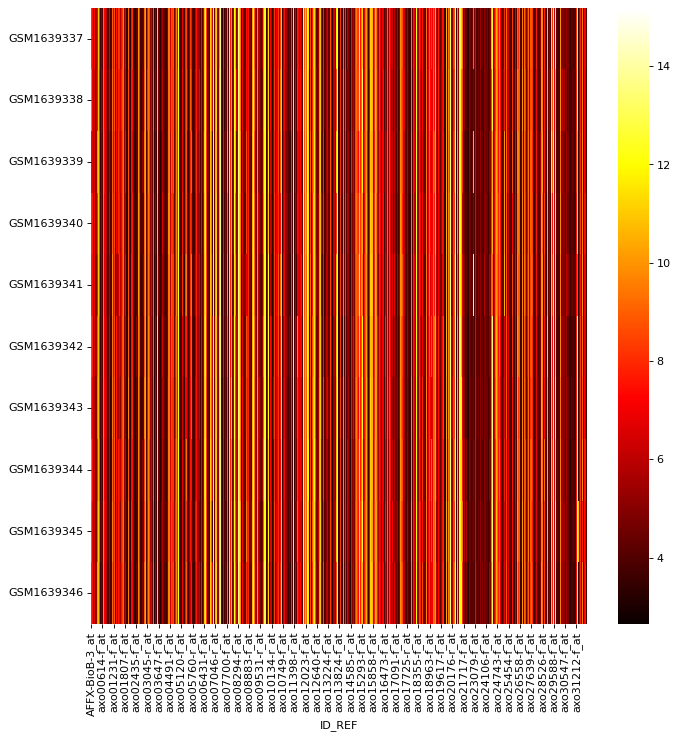

In [14]:
#Create a heatmap for the first group
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(groups[0], cmap="hot")
plt.show()


In [19]:
#Calculate the differential expression for group 1 vs group 2
results=[]
for i in range(0, groups[0].shape[1]):
    group1 = groups[0].iloc[:,i]
    group2 = groups[1].iloc[:,i]
    _, pvalue = stats.ttest_ind(group1, group2)
    results.append(pvalue)

#Perform multiple testing correction
results_corrected = smt.multipletests(results, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
#Combine the results with the gene names
results_df = pd.DataFrame({'Gene': groups[0].columns, 'pvalue': results_corrected[1]})
#Filter the results by pvalue
results_df = results_df[results_df['pvalue'] < 0.05]
print(results_df)


                  Gene    pvalue
50       axo00008-f_at  0.036736
53       axo00012-r_at  0.000732
55       axo00014-r_at  0.003193
84       axo00052-r_at  0.000854
87       axo00056-r_at  0.000001
...                ...       ...
20053    axo31698-f_at  0.046819
20060    axo31706-f_at  0.035872
20063  axo31710-f_s_at  0.040920
20067    axo31716-f_at  0.003641
20074    axo31729-f_at  0.044654

[1756 rows x 2 columns]


In [20]:
results_df


,Gene,pvalue
50,axo00008-f_at,0.036736
53,axo00012-r_at,0.000732
55,axo00014-r_at,0.003193
84,axo00052-r_at,0.000854
87,axo00056-r_at,0.000001
...,...,...
20053,axo31698-f_at,0.046819
20060,axo31706-f_at,0.035872
20063,axo31710-f_s_at,0.040920
20067,axo31716-f_at,0.003641
